In [1]:
import pylab as plt 
import pandas as pd
import numpy as np
from astropy.constants import R_earth, m_e, c
from astropy import units
from tqdm import tqdm
from scipy.constants import elementary_charge

In [2]:
from plotting_utils import add_earth

In [91]:
def plot(df_sub, fname=None):
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    cmap = plt.get_cmap('viridis')
    for i in [0]:#range(50, 500, 50):
        plt.scatter(df_sub[f'x{i}'], df_sub[f'z{i}'], c=cmap(np.linspace(0, 1, len(df_sub.index))))

    plt.xlabel('X (SM)')
    plt.ylabel('Z (SM)')
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    plt.xlim(-1, 7)
    plt.ylim(-3, 3)
    add_earth()
    plt.gca().set_aspect("equal")
        
    plt.subplot(122)
    cmap = plt.get_cmap('viridis')
    for i in [0]:#range(50, 500, 50):
        plt.scatter(df_sub[f'x{i}'], df_sub[f'y{i}'], c=cmap(np.linspace(0, 1, len(df_sub.index))))

    plt.xlabel('X (SM)')
    plt.ylabel('Y (SM)')
    plt.xlim(-1, 7)
    plt.ylim(-7, 7)
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    add_earth()
    plt.gca().set_aspect("equal")
    
    if fname:
        plt.savefig(fname)
        plt.close()


107


(88.02192803248886, 90.54444556608037, 0.9721405601655537)

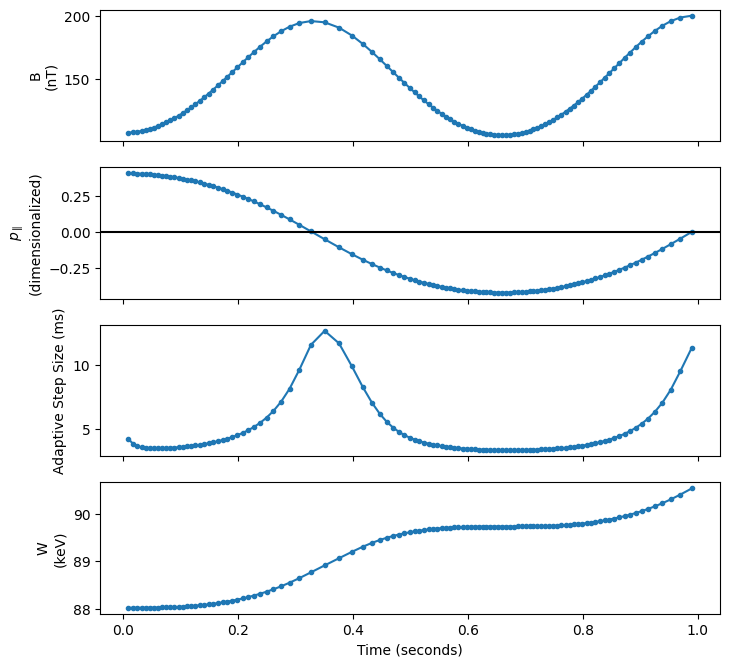

In [92]:
df = pd.read_csv('data/test_dipole.csv')
print(len(df.index))


sf = c / R_earth
t = (df['t0'].values / sf).to(units.s).value

q = - elementary_charge * units.C
sf = (q * R_earth / (m_e * c**2))
B = (df['B0'].values * units.s/ R_earth / sf).to(units.nT)

p = df['ppar0'].values
W = (df['W0'].values * (m_e * c**2)).to(units.keV).value
#print(df['W0'].values)
fig, axes = plt.subplots(4, 1,sharex=True, figsize=(8, 8), dpi=100)
axes[0].plot(t, B, '.-')
axes[0].set_ylabel('B\n(nT)')
axes[1].plot(t, p, '.-')
axes[1].set_ylabel(r'$p_\parallel$' +'\n(dimensionalized)')
axes[1].axhline(0, color='k')
axes[2].plot(t, (df['h0'].values * R_earth / c).to(units.ms).value, '.-')
axes[2].set_ylabel('Adaptive Step Size (ms)')
axes[3].plot(t, W, '.-')
axes[3].set_ylabel('W\n(keV)')
#axes[3].set_ylim(0, W.max() * 1.1)
axes[3].set_xlabel('Time (seconds)')

W[0], W[-1], W[0]/W[-1]

In [86]:
df.head()

,Unnamed: 0,t0,x0,y0,z0,ppar0,B0,W0,h0,t50,...,W400,h400,t450,x450,y450,z450,ppar450,B450,W450,h450
0,0,0.235017,5.999845,0.001533,0.056047,0.408409,-13.000543,0.216996,0.251575,0.235017,...,0.216345,0.251667,0.235017,6.013347,0.001532,0.056081,0.408408,-12.926885,0.216264,0.251678
1,1,0.486592,5.998183,0.003175,0.116039,0.408377,-13.008682,0.217066,0.264743,0.486604,...,0.216415,0.264912,0.486695,6.011690,0.003174,0.116134,0.408378,-12.934986,0.216334,0.264933
2,2,0.751336,5.994752,0.004911,0.179085,0.407876,-13.025078,0.217060,0.275092,0.751368,...,0.216411,0.275323,0.751628,6.008265,0.004912,0.179263,0.407883,-12.951328,0.216330,0.275352
3,3,1.026427,5.989358,0.006712,0.244383,0.407099,-13.050689,0.217055,0.283196,1.026489,...,0.216408,0.283477,1.026980,6.002877,0.006716,0.244664,0.407115,-12.976874,0.216327,0.283512
4,4,1.309623,5.981873,0.008558,0.311280,0.406025,-13.086222,0.217049,0.289546,1.309720,...,0.216402,0.289865,1.310492,5.995396,0.008567,0.311681,0.406052,-13.012128,0.216322,0.289904


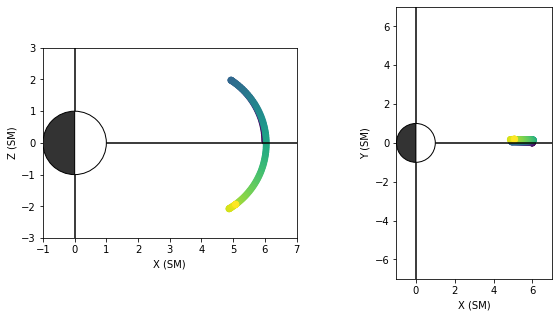

In [63]:
plot(df)

In [ ]:
import joblib
tasks = []

for i in range(len(df.index)):
    tasks.append(joblib.delayed(plot)(df.iloc[i:i+100], 'plots/%04d.png' % i))
    
print(f'Tasks: {len(tasks)}')

joblib.Parallel(n_jobs=-1, verbose=1)(tasks)

Tasks: 81671


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |